<a href="https://colab.research.google.com/github/tramyynt/Techlabs/blob/master/Task_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [84]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [146]:
df.head(20)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,time_hours,weekday,day
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,11,4,Friday
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,11,4,Friday
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,14,4,Friday
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,14,4,Friday
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,19,4,Friday
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,8,6,Sunday
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,9,6,Sunday
7,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,9,6,Sunday
8,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,9,6,Sunday
9,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,9,6,Sunday


In [148]:
df[df['brand'] =='apple']['price']

6          1387.01
7          1387.01
8          1387.01
9          1387.01
34          203.68
            ...   
2633478    1006.92
2633482     925.67
2633510     925.67
2633511     925.67
2633517     418.96
Name: price, Length: 74709, dtype: float64

In [ ]:
df['category_code'].nunique()

510

In [ ]:
df['category_code'].unique()

array(['electronics.tablet', 'electronics.audio.headphone', nan,
       'furniture.kitchen.table', 'electronics.smartphone',
       'appliances.kitchen.refrigerators', 'appliances.personal.scales',
       'electronics.video.tv', 'computers.components.cpu',
       'computers.notebook', 'computers.peripherals.monitor',
       'computers.peripherals.printer', 'appliances.kitchen.kettle',
       'computers.components.memory', 'electronics.clocks',
       'country_yard.weather_station', 'appliances.kitchen.blender',
       'accessories.bag', 'computers.peripherals.keyboard',
       'computers.peripherals.mouse', 'appliances.iron',
       'appliances.kitchen.mixer', 'electronics.telephone',
       'appliances.kitchen.meat_grinder',
       'appliances.personal.hair_cutter',
       'appliances.environment.air_heater', 'kids.skates',
       'appliances.kitchen.washer', 'appliances.kitchen.microwave',
       'furniture.bedroom.pillow', 'appliances.environment.vacuum',
       'appliances.environm

In [ ]:
df['price'].isnull().sum()

431954

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


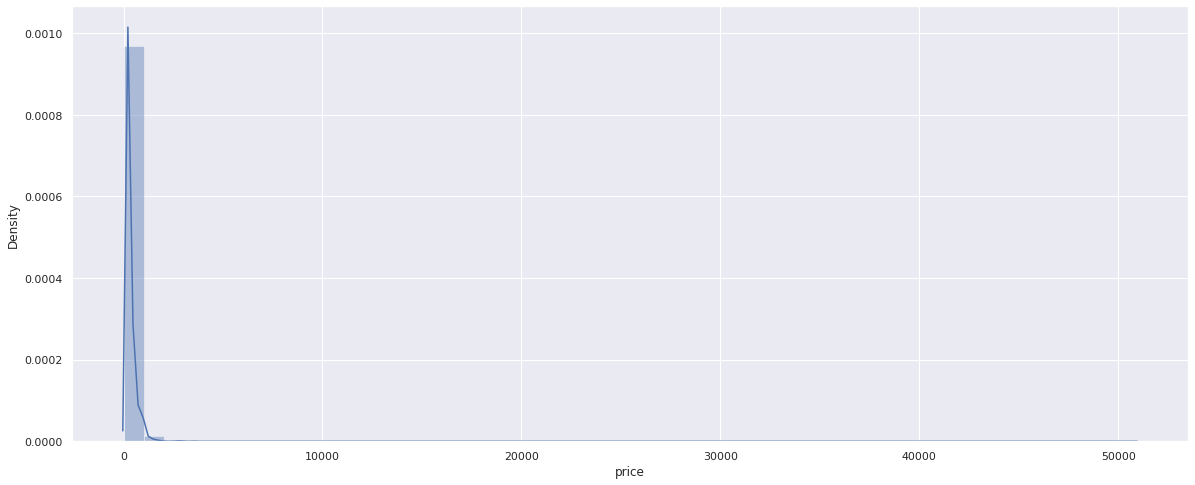

In [33]:
sns.set(rc={'figure.figsize':(20,8)})
sns.distplot(df['price'])
plt.show()

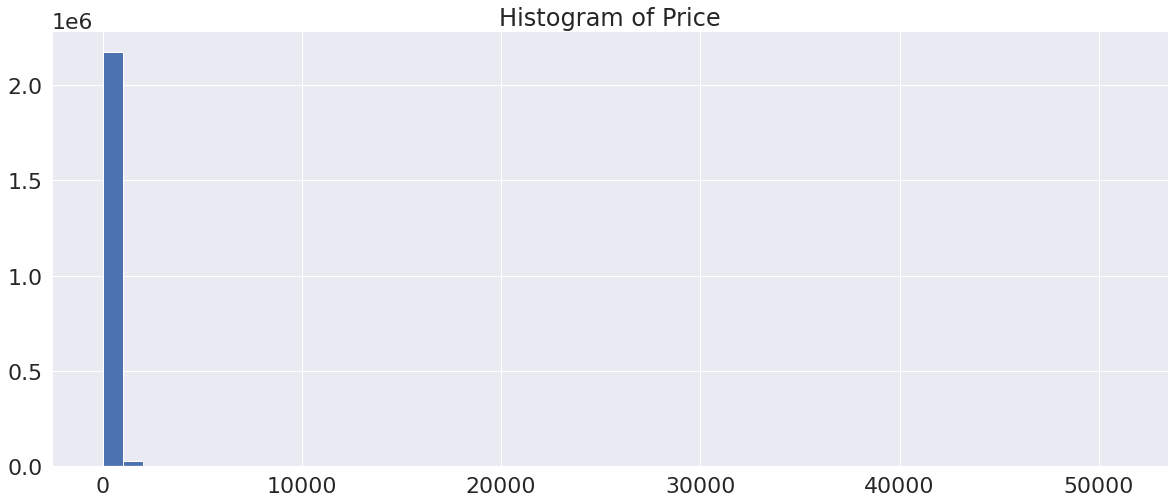

In [151]:
plt.figure(figsize =(20,8))
plt.hist(data = df,x='price', bins = 50)
plt.title('Histogram of Price')
plt.show()

2. Generate time_hours and weekday

At first, the data type of event_time should be converted to datetime.
Next, we will extract time_hours and weekday from event_time.

In [36]:
df['time_hours'] = pd.to_datetime(df['event_time'], utc = True).dt.hour

In [41]:
type(df['time_hours'][1])

numpy.int64

In [42]:
df['weekday'] = pd.to_datetime(df['event_time'], utc = True).dt.dayofweek

In [48]:
type(df['weekday'][1])

numpy.int64

3. Brand with the most sale volumns and top 5 brands comparing sales volumn

In [89]:
most_brand_sale=pd.DataFrame(df.groupby('brand').count()['order_id'].sort_values(ascending = False)).head(1)
most_brand_sale.index

Index(['samsung'], dtype='object', name='brand')

The Brand with the most sales volumn is Samsung

Text(0.5, 1.0, 'Top 5 brands with most sales volumn')

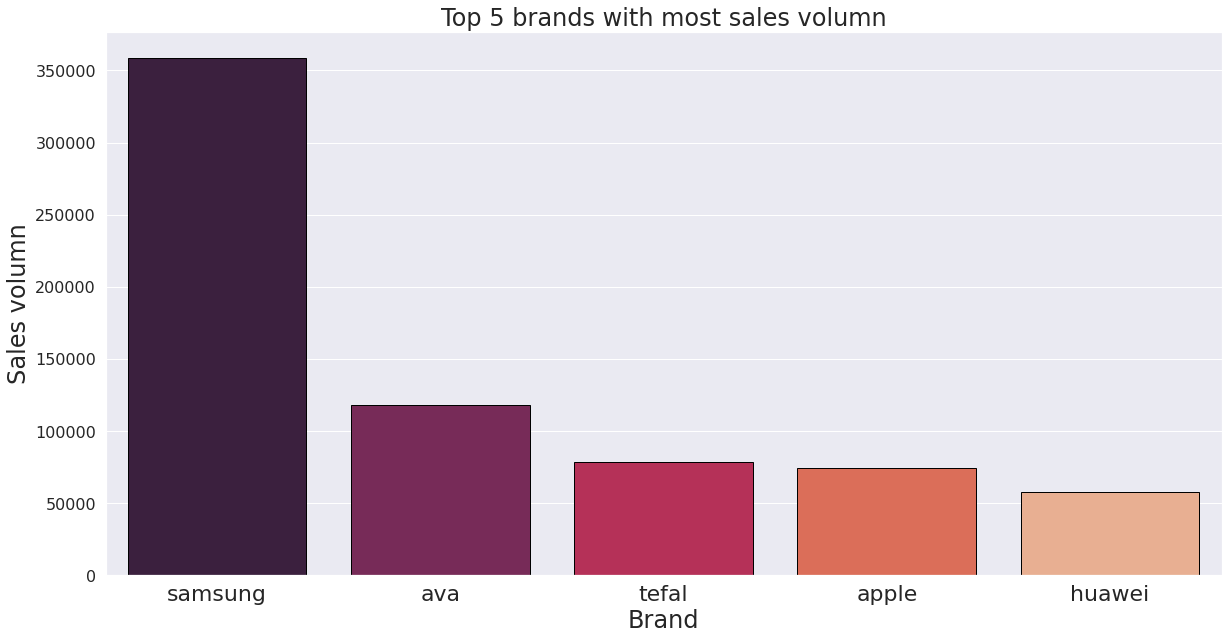

In [90]:
#Plot top 5 brands
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
top_brand = pd.DataFrame(df.groupby('brand').count()['order_id'].sort_values(ascending = False)).head(5)
sns.barplot(data = top_brand, x = top_brand.index, y = top_brand['order_id'], palette ='rocket', edgecolor ='black')
plt.xlabel('Brand')
plt.ylabel('Sales volumn')
plt.yticks(fontsize = 16)
plt.title('Top 5 brands with most sales volumn')

As observed, Samsung is the leading brand with the highest sales volumn, approximately tripples the second highest one.

4. Category with highest average price

In [103]:
cat = df.groupby('brand').mean()['price'].sort_values(ascending = False).head(1)

In [104]:
cat

brand
technogym    3515.116
Name: price, dtype: float64

The Category with highest average price is Technogym.

5. The brand and category had the most sales of price under 20 currency units

In the scope of this exercise, I skip the matter of NaN values.

In [109]:
#New dataframe with price <20
df_20 = df[df['price']<20]

In [115]:
df_20['brand'].value_counts().to_frame().reset_index().head(1)

,index,brand
0,ava,59979


In [116]:
df_20['category_code'].value_counts().to_frame().reset_index().head(1)

,index,category_code
0,computers.peripherals.mouse,34608


In [117]:
df_20[['category_code','brand']].value_counts().to_frame().reset_index().head(1)

,category_code,brand,0
0,stationery.battery,camelion,14154


The brand and category has the most sales is camelion, category of stationery.

6. Distribution of sales volumn over weekday

In [ ]:
df['day'] = order_data['order_date'].dt.day_name()

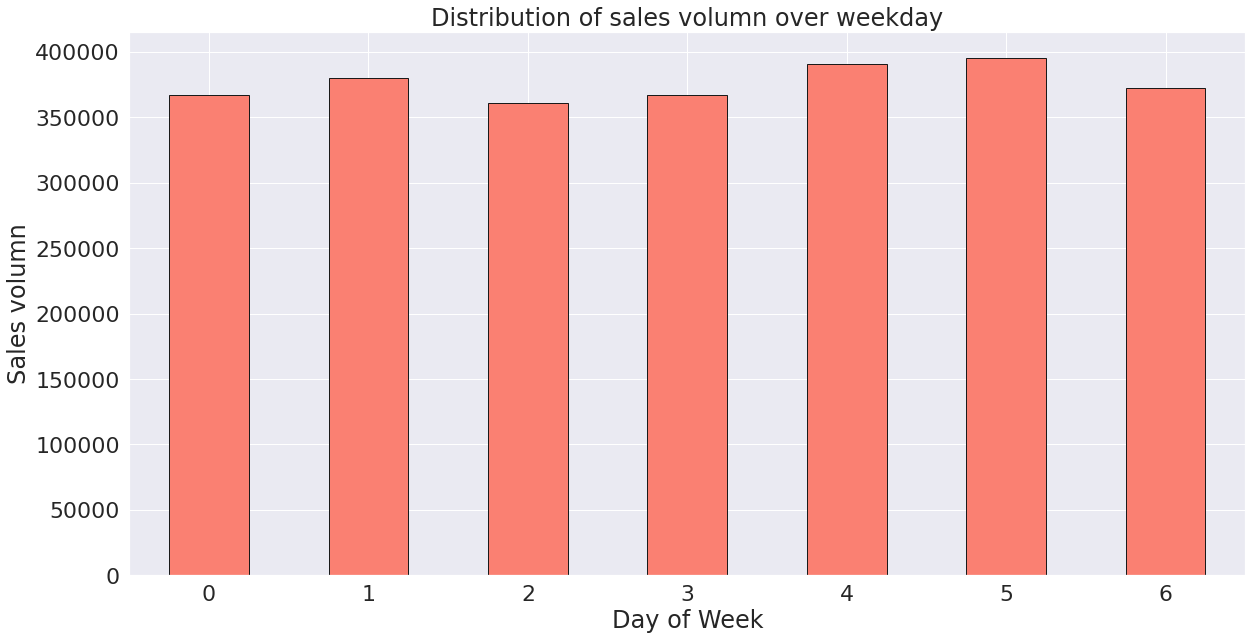

In [135]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
df.groupby('weekday').count()['order_id'].plot(kind='bar',color='salmon',edgecolor='k')
plt.xlabel('Day of Week')
plt.ylabel('Sales volumn')
plt.xticks(rotation=360)
plt.title('Distribution of sales volumn over weekday')
plt.show()

In [126]:
#create new column with day_name
df['day'] = pd.to_datetime(df['event_time'], utc = True).dt.day_name()

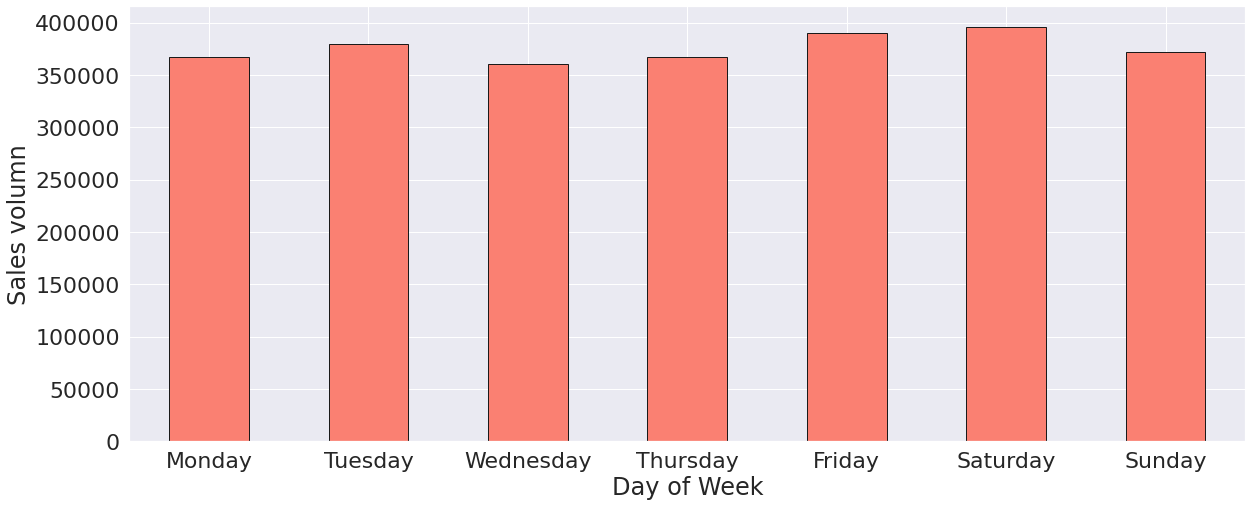

In [138]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.set(font_scale = 2)
df.groupby('day').count()['order_id'].reindex(cats).plot(kind='bar',color='salmon',edgecolor='k')
plt.xlabel('Day of Week')
plt.ylabel('Sales volumn')
plt.xticks(rotation=360)
plt.show()

### Task 3

In [143]:
#cost of sales volumn
def totalCost(x, y):
  df_xy = df[df['category_code']==x]
  df_xy['year'] = pd.to_datetime(df_xy['event_time'], utc = True).dt.year
  df_xy =df_xy[df_xy['year']==y]
  sum = df_xy['price'].sum()
  return sum

In [144]:
totalCost('electronics.tablet', 2020)

5386653.259999999

In [156]:
#function to calculate the probability for the purchase of an item of brand X to cost more than Y currency units
def prob(x,y):
  count_xy = df[(df['brand']==x)& (df['price']>y)].count()['price']
  count_x = df[df['brand']==x].count()['price']
  prob = count_xy/count_x
  return prob

In [157]:
prob('samsung',20)

0.9415732403156065